In [1]:
import os
import sys
import argparse
import scipy.io
import numpy as np
import librosa
import matplotlib.pyplot as plt

resdir  = '/Users/schwarz/Documents/projects/ABC DJ/src-git/unmixing/results-unmixdb-full/'
mixbase = 'set275mix3-resample-compressor-22'

resname = resdir + mixbase + '.mat'
rmsname = resdir + mixbase + '-rms.mat'

res = scipy.io.loadmat(resname, simplify_cells=True)
rms = scipy.io.loadmat(rmsname, simplify_cells=True)
print(res)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu May  7 02:58:48 2020', '__version__': '1.0', '__globals__': [], 'setname': 'mixotic-set275-excerpts', 'mixpath': '../../data/unmixdb-zenodo/mixotic-set275-excerpts/mixes/set275mix3-resample-compressor-22.mp3', 'mixname': 'set275mix3-resample-compressor-22', 'gtpath': '../../data/unmixdb-zenodo/mixotic-set275-excerpts/mixes/set275mix3-resample-compressor-22.labels.txt', 'timestretch': 'resample', 'effect': 'compressor', 'fadetype': 'linear', 'playlist': 'set275mix3-22', 'procstart': '07-May-2020 02:58:23', 'trackname': array(['04_rfs_-_endh.excerpt40.mp3',
       '04_the_thinker_-_granite.excerpt40.mp3',
       '05_F.l.o._-_Ganymed.excerpt40.mp3'], dtype=object), 'gtstarttime': array([-2.84885351, 28.27917981, 63.10138168]), 'gtendtime': array([ 45.00747302,  74.95193621, 112.79443338]), 'gtspeed': array([1.        , 0.96945172, 0.96315541]), 'gtbpm': 128.11767711, 'gtfades': array([[  0.        ,   7.50004535,  31

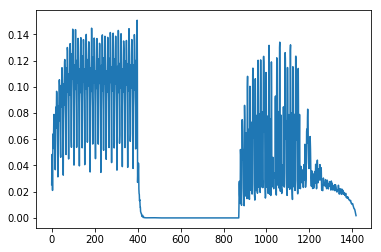

In [2]:
# check loudness of whole mix
plt.plot(rms['rms'])

37 13.0 3
5 start 0 len 29 duration 2.693514739229025
5 start 30 len 42 duration 3.900952380952381
8 start 0 len 19 duration 1.7647165532879818
9 start 0 len 19 duration 1.7647165532879818
12 start 1 len 6 duration 0.5572789115646258
12 start 8 len 6 duration 0.5572789115646258
12 start 15 len 6 duration 0.5572789115646258
12 start 22 len 6 duration 0.5572789115646258
12 start 31 len 5 duration 0.46439909297052157
12 start 39 len 4 duration 0.37151927437641724
13 start 0 len 4 duration 0.37151927437641724
13 start 5 len 16 duration 1.486077097505669
18 start 0 len 19 duration 1.7647165532879818
18 start 20 len 31 duration 2.8792743764172335
19 start 0 len 19 duration 1.7647165532879818
19 start 20 len 30 duration 2.786394557823129
21 start 3 len 8 duration 0.7430385487528345
22 start 0 len 3 duration 0.2786394557823129
22 start 17 len 2 duration 0.18575963718820862
22 start 20 len 3 duration 0.2786394557823129
22 start 24 len 4 duration 0.37151927437641724
22 start 29 len 4 duration 0.

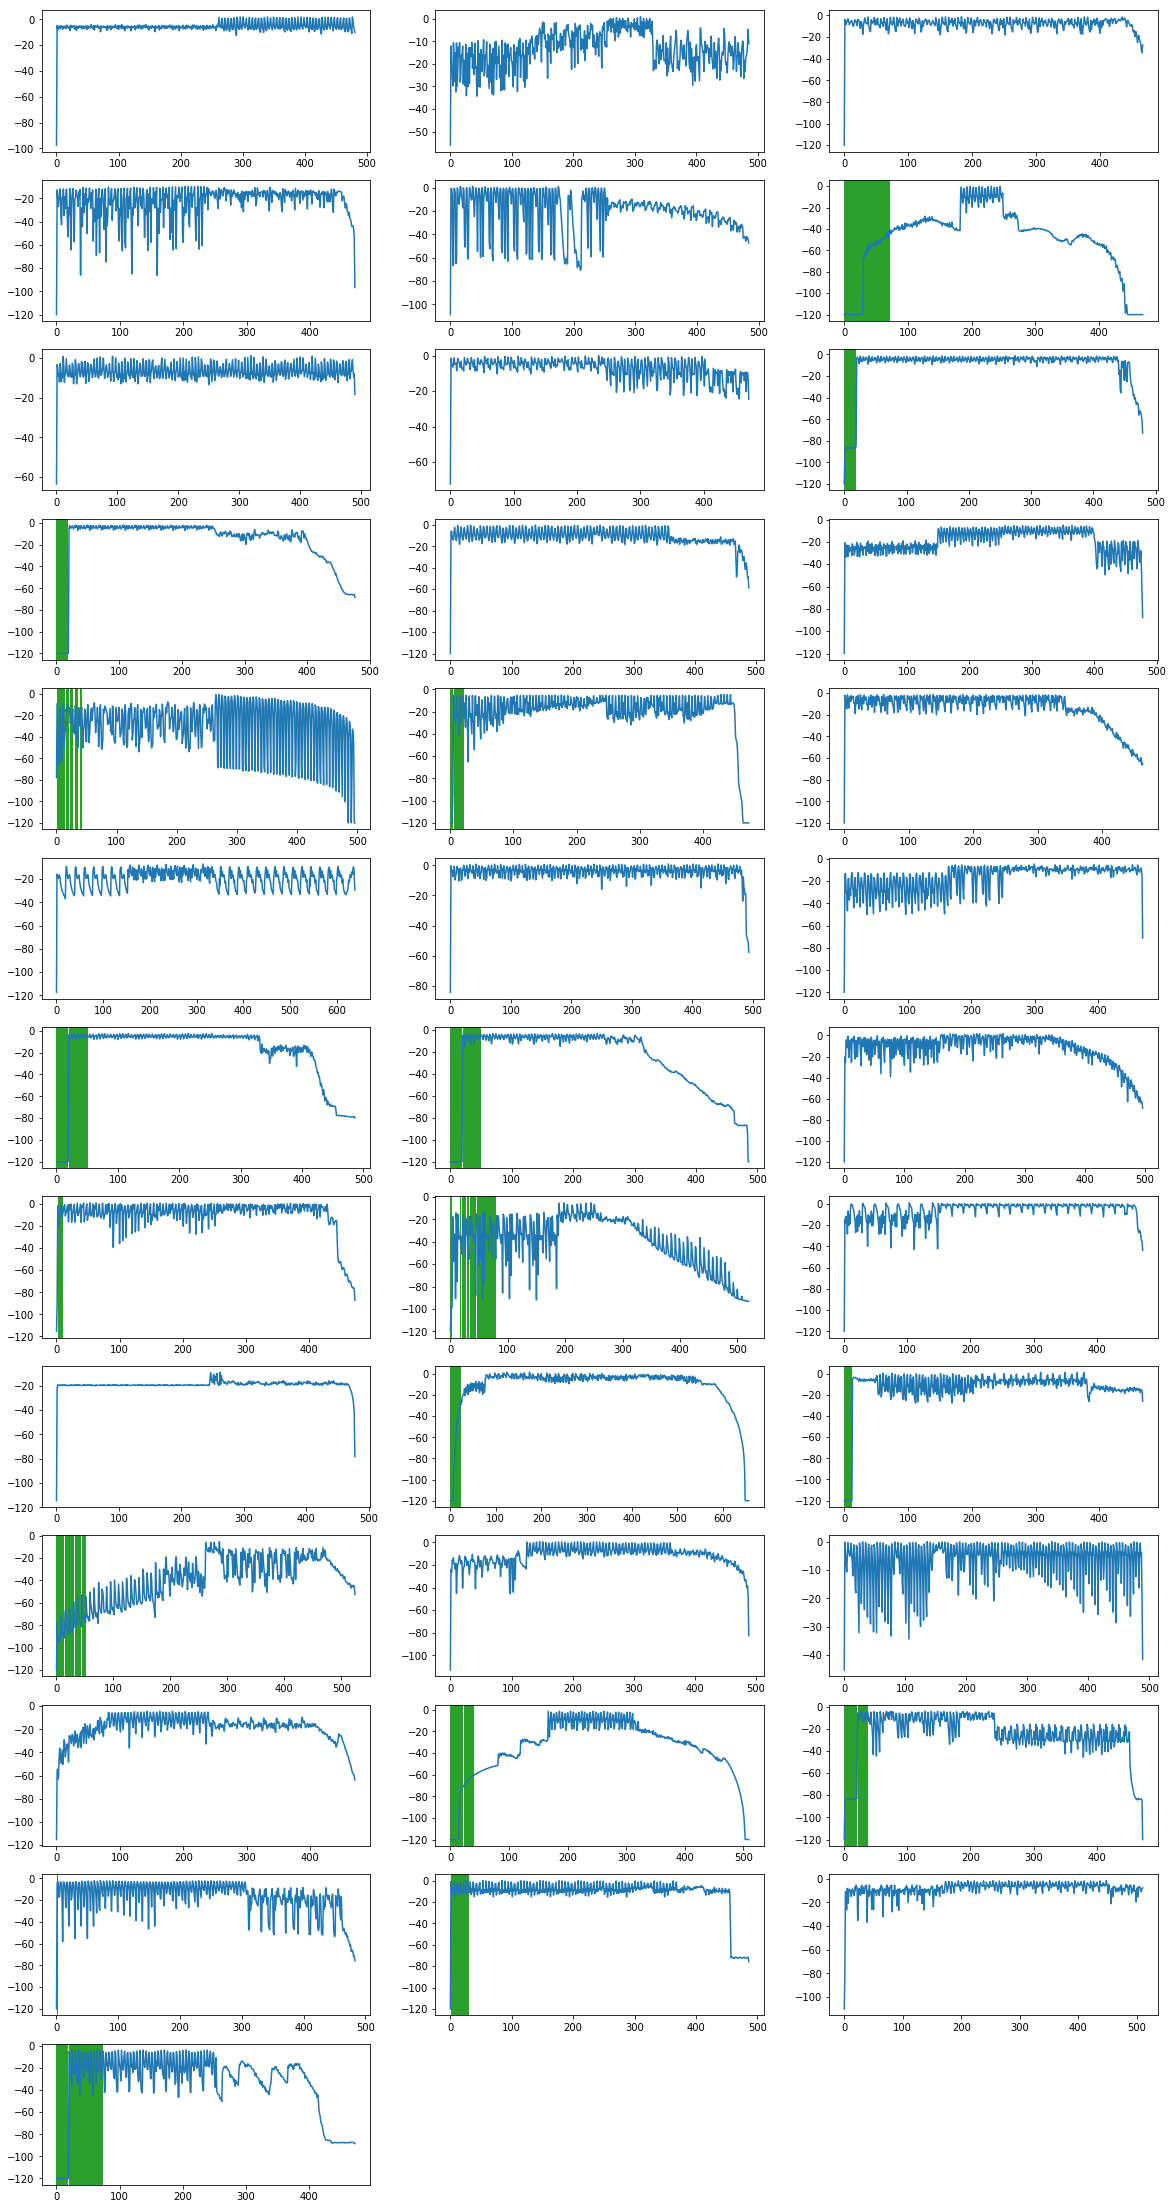

In [67]:
import glob
import soundfile
#import audiofile
import librosa
import numpy as np
import matplotlib.pyplot as plt

def find_runs (cond):
    ind  = np.argwhere(cond)
    dind = ind[1:] - ind[:-1]
    arr  = np.squeeze(dind)
    if len(arr.shape) == 0  or  len(arr) == 0:  return
    #print('arr', arr)
      
    _, i, c = np.unique(np.r_[[0], ~np.isclose(arr[:-1], arr[1:])].cumsum(), 
                        return_index = 1, 
                        return_counts = 1)
    
    for index, count in zip(i, c):
        if count > 1:
            yield index, count
        
refsongdir = '/Users/schwarz/Documents/projects/ABC DJ/data/unmixdb/excerpts/set123/refsongs/'
mp3list = glob.glob(refsongdir + '*.mp3')
winsize = 4096
hopsize = 4096

n = 3
m = np.ceil(len(mp3list) / 3)
print(len(mp3list), m, n)
plt.figure(figsize=(20, 40))

for i, mp3name in enumerate(mp3list):
    #try:
        # broken:          y, sr = librosa.load(mp3name, sr=None)
        # slow: 
        y, sr = soundfile.read(mp3name)
        # broken install: y, sr = audiofile.read(mp3name)

        #print('OK ', i, mp3name, y.shape, sr)
        
        # to mono
        y = np.sum(y, axis=1)
        #print(y.shape)
        
        # Extract RMS, convert to dB (clip at -120dB)
        rms = np.squeeze(20 * np.log10(librosa.feature.rms(y=y, frame_length=winsize, hop_length=hopsize) + 1e-6))
        #print(rms.shape, min(rms), max(rms))
        plt.subplot(m, n, i + 1)
        plt.plot(np.squeeze(rms))
        
        # find chunks <-70dB
        for start, count in find_runs(rms < -70):
            print(i, 'start', start, 'len', count, 'duration', ((count - 1) * hopsize + winsize)/ sr)
            plt.axvspan(start, start + count, facecolor='#2ca02c')

        #plt.show()
    #except:
        #print('NOT', mp3name)


In [70]:
cond = rms < -70
ind = np.argwhere(cond)
dind = ind[1:] - ind[:-1]
arr = np.squeeze(dind)
print(cond, ind, dind)
print(arr)

_, i, c = np.unique(np.r_[[0], ~np.isclose(arr[:-1], arr[1:])].cumsum(), 
                    return_index = 1, 
                    return_counts = 1)
for index, count in zip(i, c):
    if count > 1:
        print('start', index, 'len', count, 'duration', ((count - 1) * hopsize + winsize)/ sr)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

(1940480,) /Users/schwarz/Documents/projects/ABC DJ/data/unmixdb/excerpts/set123/refsongs/04_Hiroshi_Oki_-_Unagui_-_Antiritmo011.excerpt40.mp3


Text(0.5, 1.0, '/Users/schwarz/Documents/projects/ABC DJ/data/unmixdb/excerpts/set123/refsongs/04_Hiroshi_Oki_-_Unagui_-_Antiritmo011.excerpt40.mp3')

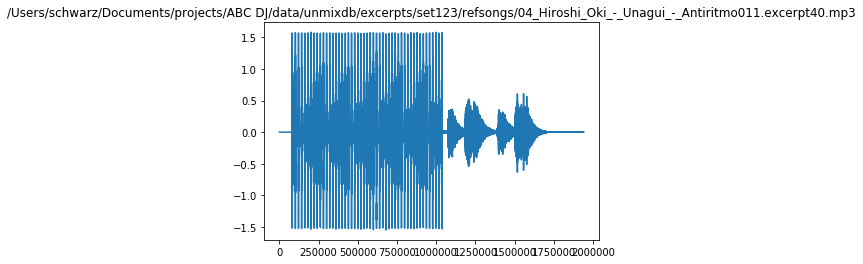

In [12]:
print(y.shape, mp3name)
plt.plot(y)
plt.title(mp3name)

164721757 22050


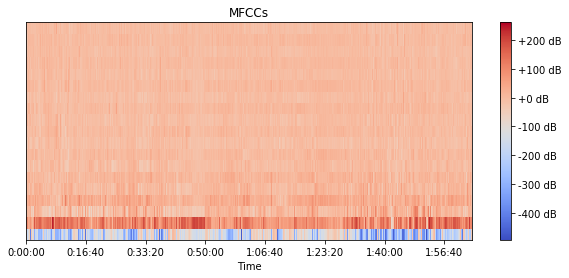

In [7]:
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = refsongdir + '01_Sascha_Muller_-_The_Book_Writer_-_Antiritmo002.excerpt40.mp3'
#audio_file = refsongdir + '02_Katsuyuki_Taguchi_-_Indigoblue_-_Antiritmo028.excerpt40.mp3'
audio_file = '/Users/schwarz/Music/radio/RL-2024-05-02-22-00.mp3'
y, sr = librosa.load(audio_file)
print(len(y), sr)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# Display MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.show()

In [66]:
rms < -70

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,